In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import networkx as nx

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import matplotlib.cm as cm

import torch
import torch_geometric as pyg
import pytorch_lightning as pl

/home/sj/.conda/envs/pl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

sachs_path = "../data/sachs_dataset/raw/sachs.csv"
gt_path = "../data/sachs_dataset/sachs_gt.csv"

adj_cols = pd.read_csv(sachs_path, nrows=0).columns

gt_df = pd.read_csv(gt_path, index_col=0)
print(gt_df)

gt_df = gt_df[adj_cols]
gt_df = gt_df.reindex(adj_cols)
print(gt_df)

ground_truth_G = nx.from_pandas_adjacency(gt_df, create_using=nx.DiGraph)

          PIP2  PKC  plcg  PIP3  pjnk  P38  PKA  praf  pmek  p44/42  pakts473
PIP2         0    1     0     1     0    0    0     0     0       0         0
PKC          0    0     0     0     1    1    0     1     1       0         0
plcg         1    1     0     0     0    0    0     0     0       0         0
PIP3         0    0     1     0     0    0    0     0     0       0         1
pjnk         0    0     0     0     0    0    0     0     0       0         0
P38          0    0     0     0     0    0    0     0     0       0         0
PKA          0    0     0     0     1    1    0     1     1       1         1
praf         0    0     0     0     0    0    0     0     1       0         0
pmek         0    0     0     0     0    0    0     0     0       1         0
p44/42       0    0     0     0     0    0    0     0     0       0         0
pakts473     0    0     0     0     0    0    0     0     0       0         0
          praf  pmek  plcg  PIP2  PIP3  p44/42  pakts473  PKA  P

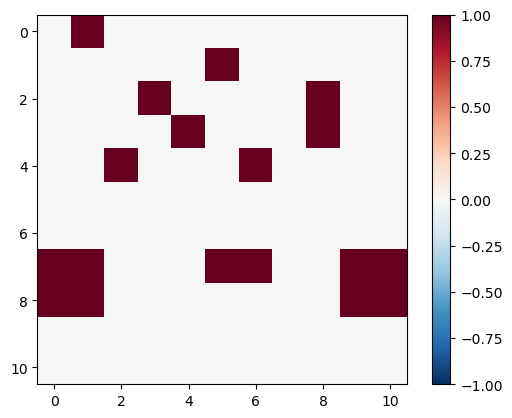

In [4]:

plt.imshow(gt_df, vmin=-1, vmax=1, cmap=cm.RdBu_r)
plt.colorbar()
plt.show()

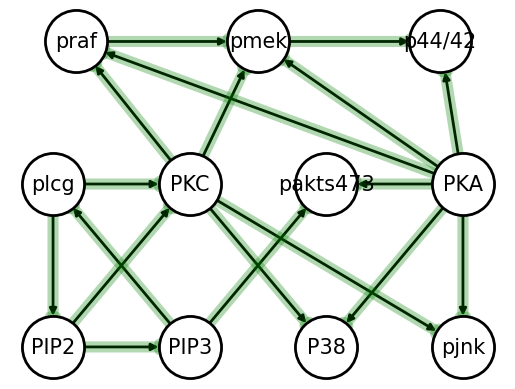

In [5]:
def get_graph_figure(G1: nx.Graph, G2: nx.Graph, **kwargs) -> figure:
    """Returns a figure of NetworkX graph with intersectioned edges & reversed edges drawn.

    Args:
        G1 (nx.Graph): Graph to draw.
        G2 (nx.Graph): Graph to compare with. (Ground truth)

    Returns:
        figure: Matplotlib figure.Figure with graph drawn.
    """
    options = {
        "prog": "patchwork",
        "graph": {
            "font_size": 15,
            "node_size": 2000,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 2,
            "width": 2,
            "with_labels": True,
        },
        "intersectioned": {
            "edge_color": "green",
            "width": 8,
            "alpha": 0.3,
        },
        "reversed": {
            "edge_color": "orange",
            "width": 8,
            "alpha": 0.3,
        }
    }
    options.update(kwargs)

    I = nx.intersection(G1, G2)
    R = nx.intersection(G1, nx.reverse(G2))

    pos = nx.nx_agraph.graphviz_layout(G2, prog=options.get("prog"))

    ax = plt.subplot()

    nx.draw(G1, pos, ax=ax, **options.get("graph"))
    nx.draw_networkx_edges(I, pos, ax=ax, **options.get("intersectioned"))
    nx.draw_networkx_edges(R, pos, ax=ax, **options.get("reversed"))

    fig = ax.get_figure()
    plt.close()

    return fig

fig = get_graph_figure(ground_truth_G, ground_truth_G)
fig.savefig("./gt_graph.png")
fig

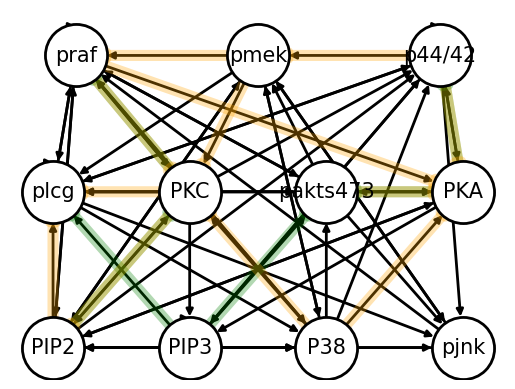

In [20]:
adj_A = np.random.uniform(low=-1, high=1, size=(11,11))
adj_A[np.abs(adj_A) < 0.5] = 0
G = nx.from_numpy_matrix(adj_A, create_using=nx.DiGraph)
mapping = dict(zip(G, adj_cols))
nx.relabel_nodes(G, mapping, copy=False)
fig = get_graph_figure(G, ground_truth_G)
fig

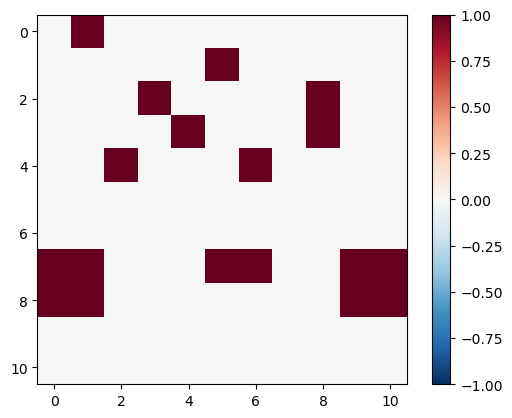

In [28]:
def get_adj_plot(adj_A: pd.DataFrame, **kwargs) -> figure:
    """Returns a figure of adjacency matrix.

    Args:
        adj_A (pd.DataFrame): Adjacency matrix to plot.

    Returns:
        figure: Plot of adjacency matrix.
    """
    options = {
        "vmin": -1,
        "vmax": 1,
        "cmap": cm.RdBu_r,
    }
    options.update(kwargs)
    
    ax = plt.subplot()

    plt.imshow(adj_A, **options)
    plt.colorbar()

    fig = ax.get_figure()
    plt.close()

    return fig
fig = get_adj_plot(gt_df)
fig

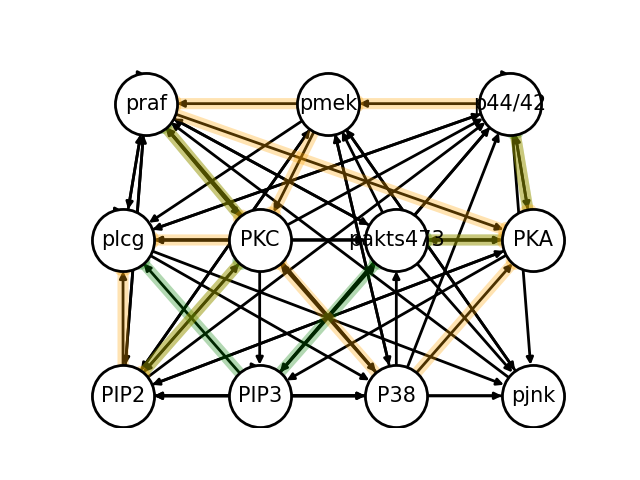

In [21]:
import PIL
import io

def fig2img(fig: figure) -> PIL.Image:
    """Converts matplotlib figure to PIL image.

    Args:
        fig (figure): Matplotlib figure.Figure.

    Returns:
        PIL.Image: PIL image.
    """
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)
    img = PIL.Image.open(buf)
    return img

img = fig2img(fig)
img

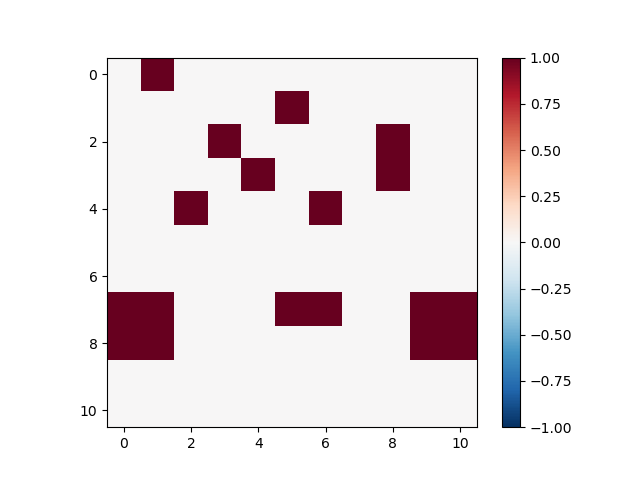

In [27]:
def figure2image(fig: figure) -> PIL.Image:
    """Converts matplotlib figure to PIL image.

    Args:
        fig (figure): Matplotlib figure.Figure.

    Returns:
        PIL.Image: PIL image.
    """
    return PIL.Image.frombytes("RGB",
                               fig.canvas.get_width_height(),
                               fig.canvas.tostring_rgb())
    
img = figure2image(fig)
img